In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
#conda install -c conda-forge keras

In [3]:
#pip install tensorflow

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [5]:
#what we are teaching
from math import cos as cosine

In [6]:
#making the data to train the model
x=list(range(0,32))
pi_2 = 3.1415926 / 2                                   # π/2 radians (90 degrees)
alpha = pi_2 / 32                                      # The increment
x_radians = list (map (lambda x: alpha * x, x))        # x_radians = { 0 ... π/2 }

y = list (map (lambda x: cosine (x), x_radians))         # y = { cosine (x0) ... , cosine (x31) }



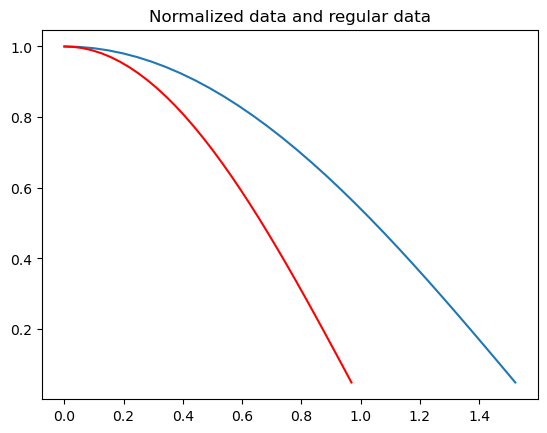

In [7]:
plt.plot (x_radians, y)                                # y = cosine (x), the blue curve

xN = list (map (lambda x: x / pi_2, x_radians))        # Normalize, 0 ≤ x ≤ 1

plt.plot (xN, y, c="r")                                # cosine is naturally normalized, red curve

plt.title ("Normalized data and regular data")

plt.show ()
#training data. each XN and its corresponding y

In [8]:
#actually start building the model
model=Sequential()
model.add(Dense(1,input_dim=1,activation='sigmoid')) #declare number of neurons per layer
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [9]:
import time
start=time.time()
h=model.fit(xN,y,verbose=False,epochs=5000) #train the model with xN and its mapped(corresponding) value in y
end=time.time()-start
end

82.0414035320282

In [10]:
h.history['loss'][2999]

0.003636991372331977

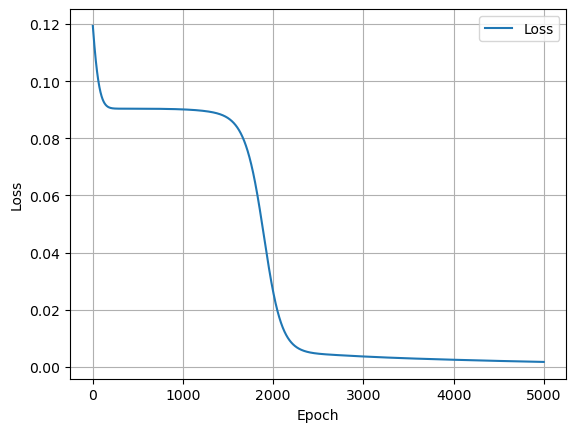

In [11]:
def LossHistory (history):
  plt.plot (history.history['loss'], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

LossHistory (h)

1/1 [==============================] - 0s 109ms/step


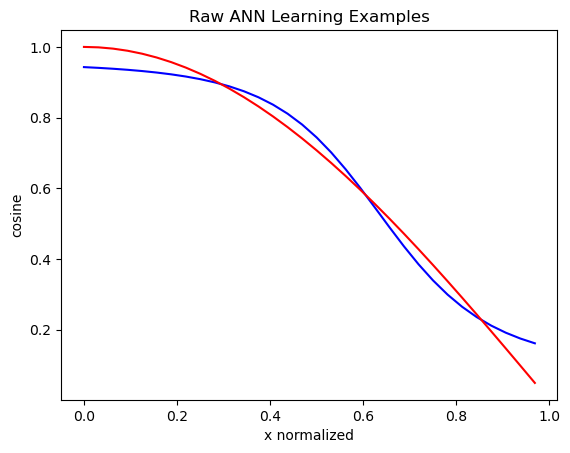

In [12]:
plt.plot (xN, model.predict (xN), c="b")  # plot x vs predicted y
plt.plot (xN, y, c="r")                   #plot x vs taught y
plt.xlabel ("x normalized")
plt.ylabel ("cosine")
plt.title ("Raw ANN Learning Examples")
plt.show ()

1/1 [==============================] - 0s 25ms/step


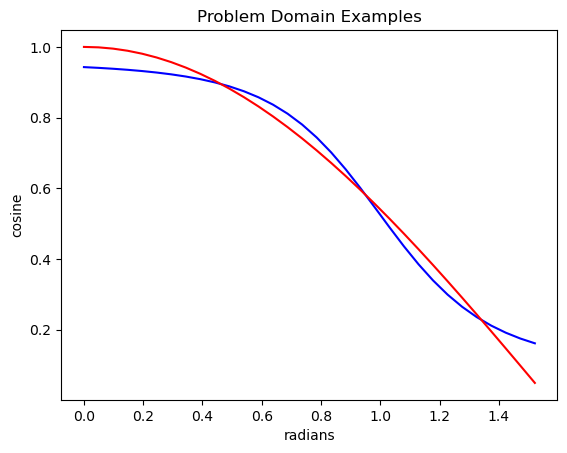

In [13]:
# We're plotting with radians, but we still invoke our ANN with normalized data
plt.plot (x_radians, model.predict (xN), c="b")  # plot x vs predicted y

plt.plot (x_radians, y, c="r")                   #plot x vs taught y
plt.xlabel ("radians")
plt.ylabel ("cosine")
plt.title ("Problem Domain Examples")
plt.show ()